In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from transformers import BertTokenizer

%matplotlib inline

/data/kits/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/kits/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/kits/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/kits/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
train_df = pd.read_json('/data/ai_challenge/vietnameseqa/data/train.json', encoding= 'utf-8')

In [3]:
train_df.head()

,id,label,question,text,title
0,u7-1570446247_1,True,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",Nguyễn Quang Hải (sinh 1997)
1,u7-1570446247_2,True,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",Nguyễn Quang Hải (sinh 1997)
2,u7-1570446247_0,False,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,Nguyễn Quang Hải (sinh 1997)
3,u7-1570446247_3,False,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",Nguyễn Quang Hải (sinh 1997)
4,u7-1570445661_0,True,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,Bóng đá


In [14]:
def get_n_words(_string):
    if len(_string) == 0:
        return 0
    _string = _string.strip()
    return len(_string.split(" "))

def get_n_sents(_string):
    if len(_string) == 0:
        return 0
    _string = _string.strip()
    return len(_string.split("."))

def get_n_tokens(row):
    _s1 = row['question']
    _s2 = row['text']
    _s = _s1 + " " + _s2
    n_tokens = len(tokenizer.tokenize(_s))
    return n_tokens

In [5]:
train_df['text_n_words'] = train_df['text'].apply(get_n_words)

In [7]:
train_df['text_n_words'].describe()

count    18108.000000
mean        62.509057
std         41.978409
min          1.000000
25%         34.000000
50%         55.000000
75%         78.000000
max        594.000000
Name: text_n_words, dtype: float64

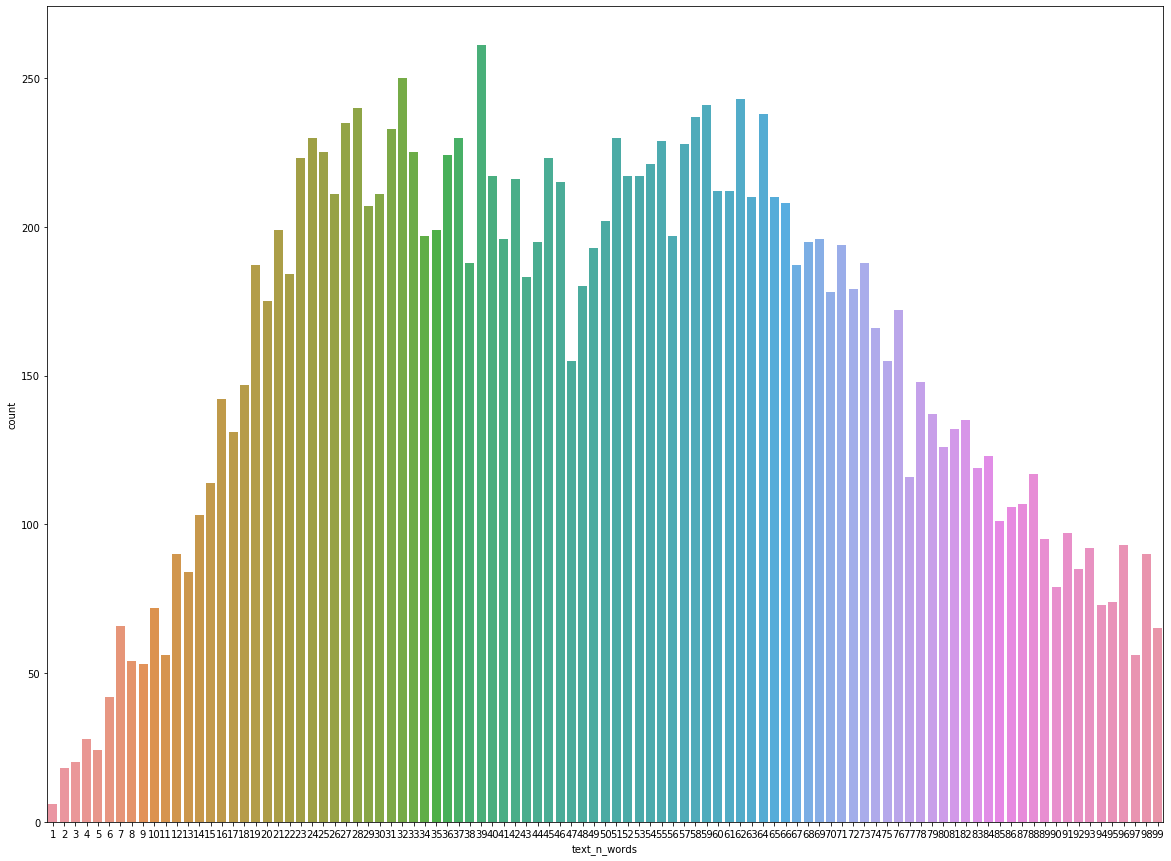

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(data=train_df[train_df['text_n_words'] < 100], x='text_n_words')

In [16]:
train_df['text_n_sents'] = train_df['text'].apply(get_n_sents)

In [17]:
train_df['text_n_sents'].describe()

count    18108.000000
mean         3.362050
std          1.913499
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         28.000000
Name: text_n_sents, dtype: float64

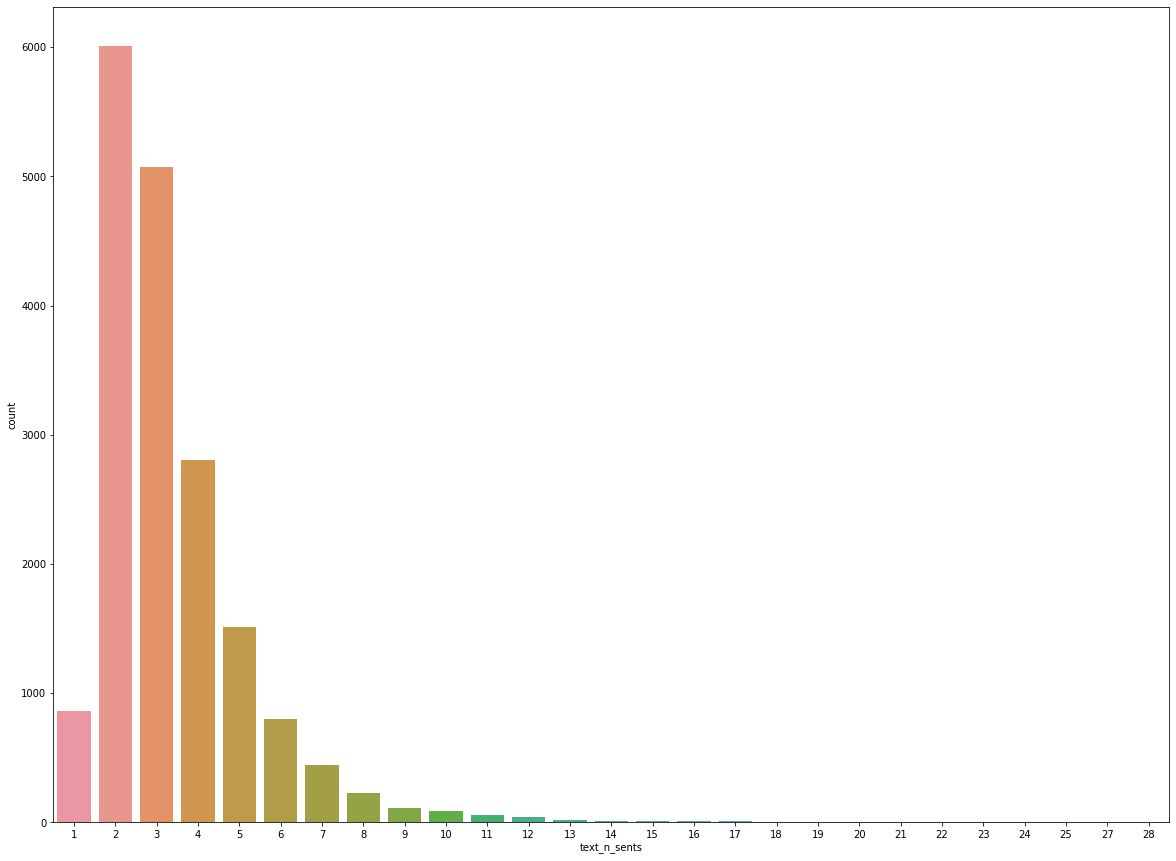

In [19]:
plt.figure(figsize=(20,15))
sns.countplot(data=train_df, x='text_n_sents')

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

I1124 21:25:21.768849 139903167796992 tokenization_utils.py:374] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-vocab.txt from cache at /home/thinhvd/.cache/torch/transformers/96435fa287fbf7e469185f1062386e05a075cadbf6838b74da22bf64b080bc32.99bcd55fc66f4f3360bc49ba472b940b8dcf223ea6a345deb969d607ca900729


In [15]:
train_df['n_tokens'] = train_df.apply(get_n_tokens, axis=1)

In [16]:
train_df.head

,id,label,question,text,title,n_tokens
0,u7-1570446247_1,True,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",Nguyễn Quang Hải (sinh 1997),65
1,u7-1570446247_2,True,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",Nguyễn Quang Hải (sinh 1997),60
2,u7-1570446247_0,False,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,Nguyễn Quang Hải (sinh 1997),39
3,u7-1570446247_3,False,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",Nguyễn Quang Hải (sinh 1997),59
4,u7-1570445661_0,True,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,Bóng đá,35


In [17]:
train_df.describe()

,n_tokens
count,18108.000000
mean,87.977027
std,53.263755
min,9.000000
25%,52.000000
50%,77.000000
75%,107.000000
max,727.000000


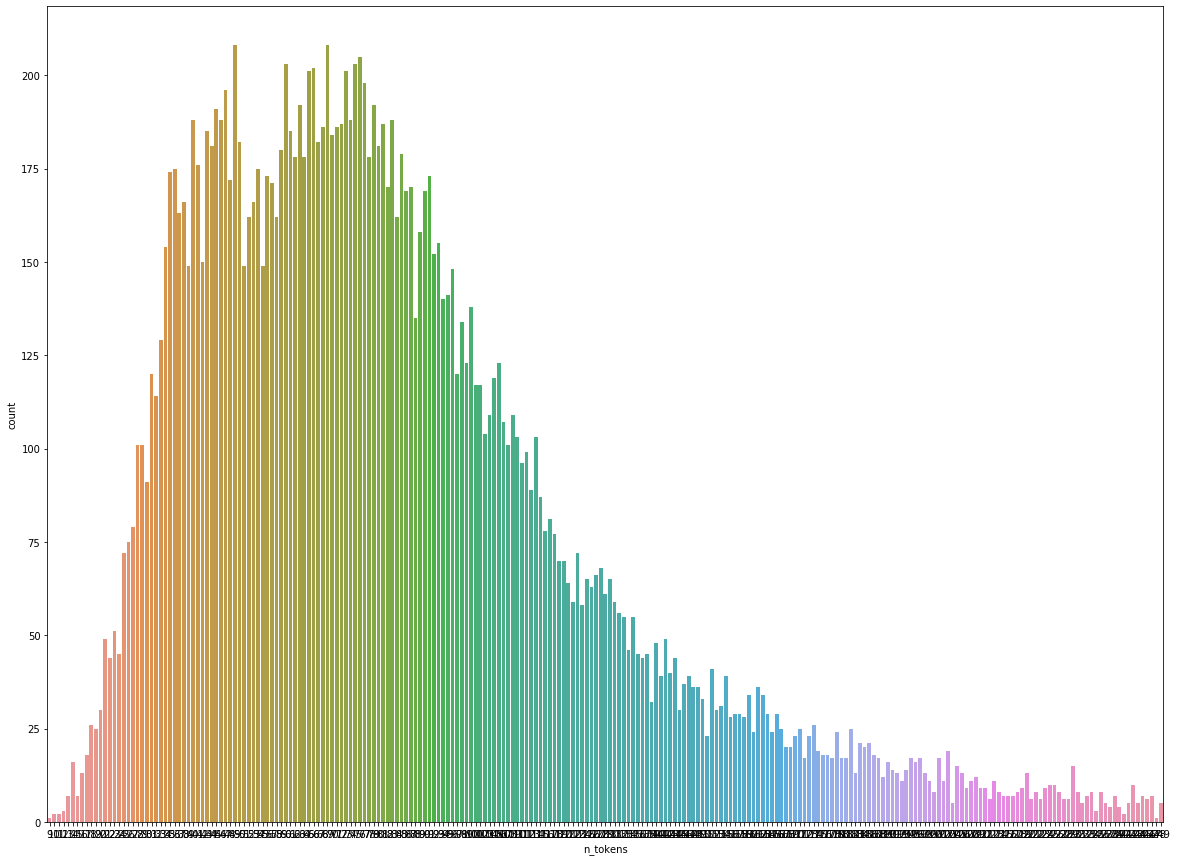

In [22]:
plt.figure(figsize=(20,15))
sns.countplot(data=train_df[train_df['n_tokens'] < 250], x='n_tokens')

## External Dataset

In [31]:
with open('/data/ai_challenge/vietnameseqa/data/external_data/train-v2.0.json') as json_file:
    data = json.load(json_file)['data']
    for item in data:
        paragraphs = item['paragraphs']
        title = item['title']
        print(title)
        for para in paragraphs:
            context = para['context']
            qas = para['qas']
            for quest_answer in qas:
                quest_id = quest_answer['id']
                question = quest_answer['question']
                is_possible = str(not quest_answer['is_impossible'])
                
#                 print('**')                
#                 print(context)
#                 print(question)
#                 print(is_possible)

Ai là thủ tướng Ấn Độ hiện tại
Ai là chủ tịch tập đoàn Hòa Phát
Bài kiểm tra IQ đầu tiên do ai phát triển?
Tên thật của chúa Sãi là gì ?
Tổng thống Hàn Quốc là ai
Nguyễn Đình Chiểu ví Lục Vân Tiên trong cảnh cứu Kiều Nguyệt Nga với ai?
Ai là tổng thống Philippines
Mẹ của Mỹ Tâm
Ai là Thủ tướng Nhật Bản
Bộ trưởng bộ ngoại giao Việt Nam là ai
Con gái của Thanos
Con trưởng của Lý Công Uẩn là ai
Bộ phim Jurassic Park do ai làm đạo diễn?
Ai là chồng của Hillary Clinton
Ai là người đã đưa ra Nguyên lý Tảng băng trôi
Ai sáng lập ra logic học và phép biện chứng?
chồng của Hari Won
Ai chỉ huy trận Bạch Đằng năm 938
tổng giám đốc công ty cổ phần Vinhomes
Ai là tổng giám đốc công ty Thành Thắng
Biệt danh Chanh là của ca sỹ nào
Ai là tác giả của ngôn ngữ lập trình Perl
Ai là người thứ hai đặt chân lên Mặt trăng?
Ai là người sáng lập ra hãng thời trang Armani?
Ai là người tìm ra tia X
Ai là tổng giám đốc công ty cổ phần Vinhomes
Con của Messi
Thủ tướng Úc
Tổng thống Nga hiện tại là ai
tổng giám đốc

In [3]:
stop_words = []
with open("./stop_words.txt") as file:
    for line in file:
        stop_words.append(line.strip())

In [4]:
stop_words

['cho',
 'các',
 'còn',
 'có',
 'cũng',
 'của',
 'hai',
 'hoa',
 'họ',
 'introduction',
 'khi',
 'không',
 'loài',
 'là',
 'làm',
 'một',
 'ngoài',
 'ngày',
 'người',
 'nhiều',
 'như',
 'nhất',
 'những',
 'này',
 'nó',
 'năm',
 'ra',
 'sau',
 'theo',
 'thuộc',
 'tháng',
 'thêm',
 'trong',
 'trên',
 'tên',
 'tại',
 'tỉnh',
 'từ',
 'và',
 'vào',
 'về',
 'với',
 'xem',
 'đã',
 'đó',
 'được',
 'đến',
 'để']